In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as pn
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
full_emb = pd.read_parquet('data/yeast_emb_full.parquet')
cvae_emb  = pd.read_parquet('CVAE/cvae_embeddings.parquet')
smf30_filtered_emb = pd.read_parquet('CVAE/smf30_filtered_emb.parquet')

In [3]:
# full_emb.describe()

In [4]:
# full_emb.hist(bins=50, figsize=(20, 15))
# plt.suptitle("Embedding Distributions")
# plt.show()

In [5]:
# full_emb.plot(kind="box", figsize=(20, 5), vert=False, showmeans=True)
# plt.title("Embedding Value Ranges (Boxplot)")
# plt.show()

In [6]:
# Read in single mutant fitness data from Constanzo et al. 2016
smf_filter = pd.read_csv('data/smf.csv', index_col = 0)

<Axes: >

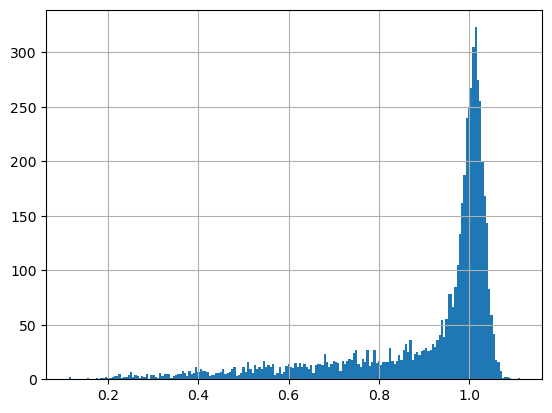

In [7]:
smf_filter.smf_30.hist(bins=200)

In [8]:
full_emb = full_emb.set_index('gene_id')
smf30_filtered_emb

,gene_id,smf_26,smf_26_sd,smf_30,smf_30_sd,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,...,data_Turco_expression11808,data_Turco_expression16247,data_Turco_expression16248,data_Turco_expression16249,data_Turco_expression16250,data_Turco_expression16683,data_Turco_expression16684,data_Turco_expression16685,data_Turco_expression21888,data_Turco_expression21932
0,YAL002W,0.7640,0.0773,0.7640,0.0773,0.365902,0.310000,0.372057,0.043956,0.019623,...,-1.454995,0.120081,0.120937,0.127851,0.128291,-1.802252,-1.220942,-0.876121,0.854368,1.492454
1,YAL005C,1.0405,0.0109,1.0405,0.0109,0.347956,0.323333,0.441329,0.009346,0.038941,...,0.598221,0.120081,0.120937,0.127851,0.128291,0.298290,-0.298534,-0.468282,-1.776051,0.372677
2,YAL007C,1.0260,0.0769,1.0260,0.0769,0.362911,0.290000,0.372093,0.037209,0.032558,...,0.109659,0.120081,0.120937,0.127851,0.128291,0.846470,0.162670,0.347396,-0.280199,0.324833
3,YAL008W,1.0445,0.0746,1.0445,0.0746,0.381854,0.296667,0.388889,0.045455,0.020202,...,0.200656,0.120081,0.120937,0.127851,0.128291,1.086489,1.085078,2.182672,0.616041,1.037160
4,YAL009W,0.9165,0.0205,0.9165,0.0205,0.368893,0.323333,0.414414,0.042471,0.011583,...,0.203895,0.120081,0.120937,-4.034924,0.128291,0.035502,0.011022,0.071563,0.298273,-0.242586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,YPR196W,1.0220,0.0196,1.0220,0.0196,0.377866,0.303333,0.389362,0.023404,0.010638,...,-0.172602,0.120081,0.120937,0.127851,0.128291,0.564738,0.393272,1.163074,-0.831572,-0.513301
4237,YPR198W,0.9962,0.1082,0.9962,0.1082,0.294118,0.283333,0.376304,0.027624,0.020258,...,-0.015988,3.513607,0.120937,0.127851,0.128291,-0.277655,0.623874,0.143477,-1.255263,-0.070312
4238,YPR199C,1.0128,0.0649,1.0128,0.0649,0.329013,0.283333,0.391156,0.030612,0.020408,...,-0.006454,0.120081,0.120937,0.127851,0.128291,1.170261,0.623874,0.551316,-0.699168,-0.390249
4239,YPR200C,1.0457,0.0119,1.0457,0.0119,0.366899,0.313333,0.376923,0.038462,0.015385,...,0.291845,0.120081,0.120937,0.127851,0.128291,0.625506,0.162670,0.755235,-1.114033,-0.734796


In [9]:
cvae_emb = cvae_emb.set_index(smf30_filtered_emb['gene_id'])

In [10]:
cvae_emb

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
gene_id,,,,,,,,,,,,,,,,,,,,,
YAL002W,0.325295,-0.105828,0.082543,-0.231431,-0.323400,0.156072,0.330923,-0.220660,-0.170967,-0.160621,...,-0.166344,0.443561,0.257173,-0.363952,0.216912,-0.384802,-0.075113,0.085874,0.521037,-0.203890
YAL005C,0.237152,0.095649,-0.010449,-0.272731,-0.245852,0.151844,0.018031,-0.247101,-0.020103,-0.032771,...,-0.154524,0.400608,0.241349,-0.158528,0.241499,-0.344899,0.064306,-0.150467,0.478132,-0.124720
YAL007C,0.267510,0.034850,0.114882,-0.190872,-0.048388,0.086446,0.117770,-0.147461,-0.117231,-0.233943,...,-0.281913,0.490950,0.183257,-0.193923,0.362287,-0.456725,-0.088854,0.036148,0.419512,-0.054308
YAL008W,0.346516,-0.015320,0.121630,-0.360562,-0.255766,0.074557,0.264808,-0.203825,-0.342003,-0.266352,...,-0.296943,0.507786,0.232659,-0.247817,0.493717,-0.474813,0.038628,0.019573,0.480717,-0.180569
YAL009W,0.263943,-0.072599,0.079480,-0.307721,-0.272119,0.183881,0.279831,-0.290302,-0.168159,-0.100433,...,-0.263338,0.543865,0.250153,-0.312594,0.271898,-0.513154,-0.007824,0.099780,0.527569,-0.176549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR196W,0.238841,-0.030349,-0.016558,-0.219219,-0.234503,0.070078,0.134080,-0.233667,-0.105786,-0.163497,...,-0.246076,0.514870,0.258170,-0.180515,0.337743,-0.435440,0.158328,0.069323,0.420891,-0.265110
YPR198W,0.185369,0.070907,0.059316,-0.124577,-0.125037,0.107440,0.135682,-0.328815,-0.091093,-0.133371,...,-0.147703,0.454632,0.215006,-0.372603,0.373114,-0.288845,0.009699,0.094778,0.327752,-0.253296
YPR199C,0.213096,-0.054224,0.062625,-0.205422,-0.199636,0.040343,0.356561,-0.365600,-0.150384,-0.196384,...,-0.325193,0.475439,0.385135,-0.231830,0.220796,-0.497597,0.017653,0.149113,0.442179,-0.122874


In [11]:
# PCA on VAE embeddings ?

In [12]:
A = smf_filter.merge(cvae_emb, on='gene_id').dropna()
embeddings = A.iloc[:, 5:]
smf = A['smf_30']

In [13]:
smf = pd.DataFrame(smf)

In [14]:
scaler_conditioning = StandardScaler()
smf_scaled = scaler_conditioning.fit_transform(smf)

In [16]:
# Split data into train, validation, and test sets
train_embed, temp_embed, train_smf, temp_smf = train_test_split(
    embeddings, smf_scaled, test_size=0.3, random_state=42
)

val_embed, test_embed, val_smf, test_smf = train_test_split(
    temp_embed, temp_smf, test_size=0.5, random_state=42
)

R2:  0.8071178679693035


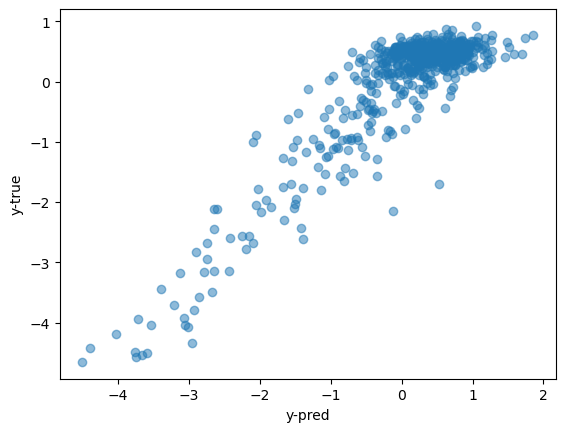

In [17]:
# How predictive are sequence features?
lm = LinearRegression().fit(train_embed, train_smf)
print('R2: ', lm.score(val_embed, val_smf))

plt.scatter(lm.predict(val_embed), val_smf, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.show()

In [208]:
# Ananlyze what is wrong

In [209]:
def compare_original_and_reconstructed(original_path, reconstructed_path, specific_sample_idx=None):
    """
    Compare original and reconstructed data visually and numerically.

    Parameters:
        original_path (str): Path to the original data file.
        reconstructed_path (str): Path to the reconstructed data file.
        specific_sample_idx (int, optional): Specific sample index to analyze. Default is None.
    """
    # Load data
    original_data = pd.read_parquet(original_path)
    original_data =  pd.concat([original_data.iloc[:, :1], original_data.iloc[:, 5:]], axis=1)
    original_data = original_data.set_index('gene_id').values
    reconstructed_data = pd.read_parquet(reconstructed_path).values

    # Compute reconstruction error
    errors = np.mean((original_data - reconstructed_data) ** 2, axis=1)
    print("Mean Reconstruction Error (MSE):", np.mean(errors))

    # Plot error distribution
    plt.hist(errors, bins=50, alpha=0.7, color="blue", edgecolor="black")
    plt.title("Reconstruction Error Distribution")
    plt.xlabel("Reconstruction Error (MSE)")
    plt.ylabel("Frequency")
    plt.grid(axis="y")
    plt.show()

    # Select samples for detailed analysis
    if specific_sample_idx is not None:
        sample_indices = [specific_sample_idx]
    else:
        sample_indices = np.random.choice(len(original_data), size=5, replace=False)

    # Visual comparison and scatter plot
    for idx in sample_indices:
        print(f"Sample {idx}:")
        print("Original (first 5 features):", original_data[idx, :5])
        print("Reconstructed (first 5 features):", reconstructed_data[idx, :5])
        print("Reconstruction Error (MSE):", errors[idx])
        print()

        # Scatter plot of original vs. reconstructed features
        plt.scatter(original_data[idx, :], reconstructed_data[idx, :], alpha=0.6)
        plt.plot([min(original_data[idx, :]), max(original_data[idx, :])], 
                 [min(original_data[idx, :]), max(original_data[idx, :])], 
                 color="red", linestyle="--")
        plt.title(f"Original vs. Reconstructed Features (Sample {idx})")
        plt.xlabel("Original Features")
        plt.ylabel("Reconstructed Features")
        plt.show()

def analyze_latent_space(embeddings_path):
    """
    Analyze the spread of latent space embeddings.

    Parameters:
        embeddings_path (str): Path to the latent embeddings file.
    """
    # Load embeddings
    embeddings = pd.read_parquet(embeddings_path).values

    # Analyze spread
    print("Latent Space Mean (first 5 dimensions):", np.mean(embeddings, axis=0)[:5])
    print("Latent Space Variance (first 5 dimensions):", np.var(embeddings, axis=0)[:5])

    # Visualize latent space distribution
    plt.hist(embeddings.flatten(), bins=50, alpha=0.7, color="green", edgecolor="black")
    plt.title("Latent Space Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(axis="y")
    plt.show()

Mean Reconstruction Error (MSE): 0.1316861929124291


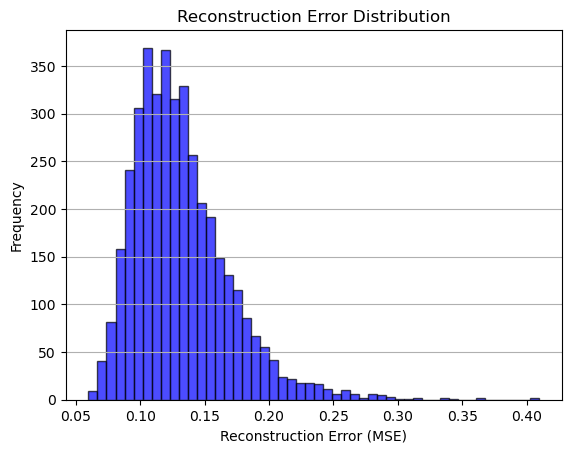

Sample 2382:
Original (first 5 features): [0.40478564 0.27666667 0.39607201 0.03436989 0.01636661]
Reconstructed (first 5 features): [ 0.44252107  0.15721835  0.5311148  -0.02048603 -0.10461845]
Reconstruction Error (MSE): 0.12581057527187023



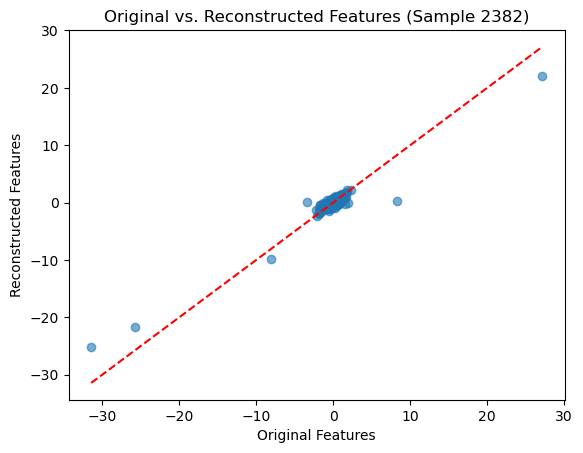

Sample 3038:
Original (first 5 features): [0.36091725 0.29666667 0.40880503 0.02830189 0.03638814]
Reconstructed (first 5 features): [ 0.07451531  0.75048375  0.36600795  0.26612702 -0.28949732]
Reconstruction Error (MSE): 0.1226060652027399



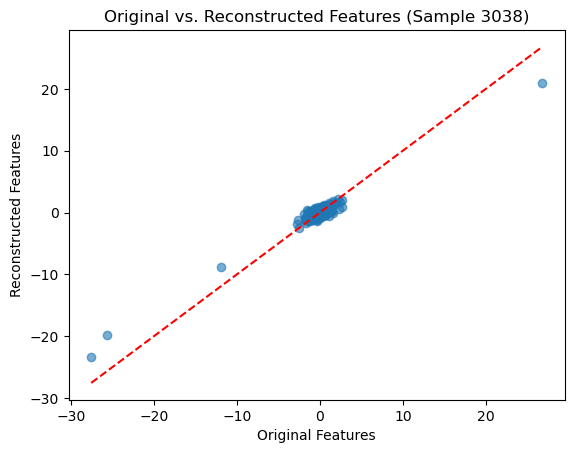

Sample 3841:
Original (first 5 features): [0.35294118 0.33333333 0.43       0.035      0.025     ]
Reconstructed (first 5 features): [ 0.33748597  0.28011528 -0.06007034  0.12322006  0.25217208]
Reconstruction Error (MSE): 0.1277309687092124



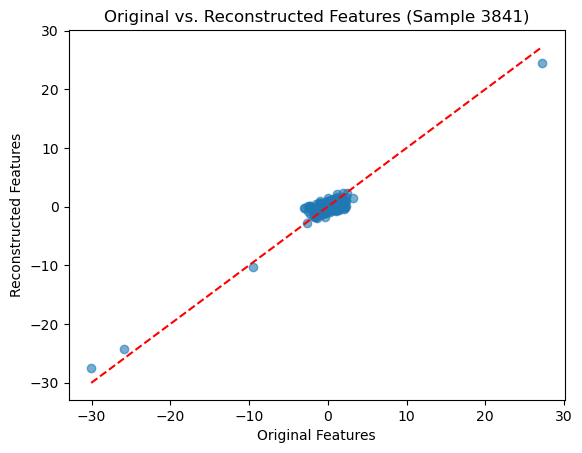

Sample 2299:
Original (first 5 features): [0.39381854 0.35666667 0.45755306 0.02621723 0.02434457]
Reconstructed (first 5 features): [0.49020275 0.27255067 0.5010795  0.18893941 0.24534348]
Reconstruction Error (MSE): 0.16092555517278417



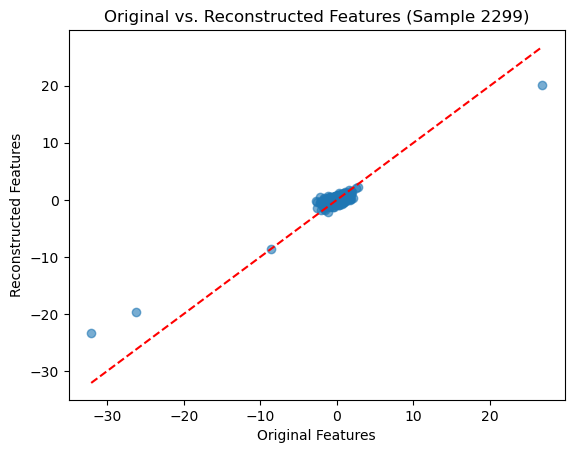

Sample 693:
Original (first 5 features): [0.36889332 0.51666667 0.41294458 0.03225806 0.02233251]
Reconstructed (first 5 features): [ 0.25071087  0.13711387  0.8010931  -0.27281106  0.3383516 ]
Reconstruction Error (MSE): 0.12405116665326481



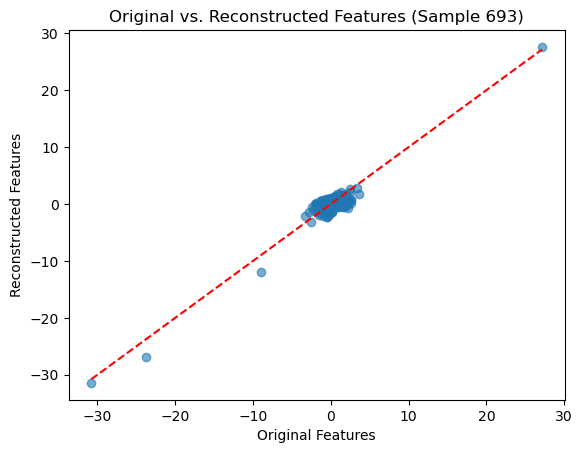

In [210]:
original_path = "CVAE/smf30_filtered_emb.parquet"  # Original input data
reconstructed_path = "CVAE/cvae_reconstructed.parquet"  # Reconstructed data
embeddings_path = "CVAE/cvae_embeddings.parquet"  # Latent space embeddings

# Compare original and reconstructed data
# compare_original_and_reconstructed(original_path, reconstructed_path)

compare_original_and_reconstructed(original_path, reconstructed_path)


# Analyze latent space
# analyze_latent_space(embeddings_path)